## Notebook Setup

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import os # interact with operating system
import seaborn as sns # data visualization
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, SimpleRNN, LSTM, GRU, Reshape, Activation, Bidirectional, LeakyReLU
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc, log_loss, accuracy_score, classification_report, matthews_corrcoef
import io
import sys
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e13/sample_submission.csv
/kaggle/input/playground-series-s3e13/train.csv
/kaggle/input/playground-series-s3e13/test.csv


In [3]:
# Notebook display settings
desired_width = 600
display_columns = 300
width = 100
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth = desired_width)
pd.set_option('display.max_columns', display_columns)
pd.set_option('display.max_colwidth', None)

## Load Data

In [4]:
# Load and view the training data
train_data = pd.read_csv("/kaggle/input/playground-series-s3e13/train.csv")
print('The shape of the training data is:', train_data.shape)
train_data.head()

The shape of the training data is: (707, 66)


,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [5]:
test_data = pd.read_csv("/kaggle/input/playground-series-s3e13/test.csv")
test_data.head()

,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash
0,707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,708,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,709,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,710,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,711,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis

In [6]:
def get_dataframe_details(df, target_col_name):
    """Get info and describe target column."""
    
    # Create a StringIO object to capture the output of df.info()
    buffer = io.StringIO()
    
    # Save the original stdout (console output)
    original_stdout = sys.stdout
    
    # Redirect stdout (console output) to the StringIO buffer
    sys.stdout = buffer
    
    # Get info on df
    df.info()
    
    # Restore the original stdout
    sys.stdout = original_stdout
    
    # Get the string value from the StringIO buffer
    df_info = buffer.getvalue()
    
    # Describe target column
    df_describe = df[target_col_name].describe()
    
    return df_info, df_describe

In [12]:
# Instantiating the function from above
i, d = get_dataframe_details(train_data, 'prognosis')
print(i,d, sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     707 non-null    int64  
 1   sudden_fever           707 non-null    float64
 2   headache               707 non-null    float64
 3   mouth_bleed            707 non-null    float64
 4   nose_bleed             707 non-null    float64
 5   muscle_pain            707 non-null    float64
 6   joint_pain             707 non-null    float64
 7   vomiting               707 non-null    float64
 8   rash                   707 non-null    float64
 9   diarrhea               707 non-null    float64
 10  hypotension            707 non-null    float64
 11  pleural_effusion       707 non-null    float64
 12  ascites                707 non-null    float64
 13  gastro_bleeding        707 non-null    float64
 14  swelling               707 non-null    float64
 15  nausea

In [13]:
def plot_target_column_distribution(df, col_name):
    """Function to plot the distribution of the traget column for any dataset."""
    
    # Required library
    import matplotlib.pyplot as plt # data visualization

    # Count of unique values
    print(f"Unique values in {col_name} column:", df[col_name].nunique())

    # Count the values in a column
    value_counts = df[col_name].value_counts()

    # Set the size of the figure
    plt.figure(figsize=(20, 6))

    # Create a bar chart
    plt.bar(value_counts.index, value_counts.values)

    # Add data labels to the bars
    for i, count in enumerate(value_counts.values):
        plt.text(i, count+1, str(count), ha='center', va='bottom')

    # Set the chart title and axis labels
    plt.title(f"Count of Values in '{col_name}' Column")
    plt.xlabel("Column Categories")
    plt.ylabel("Count")

    # Show the chart
    plt.show()


Unique values in prognosis column: 11


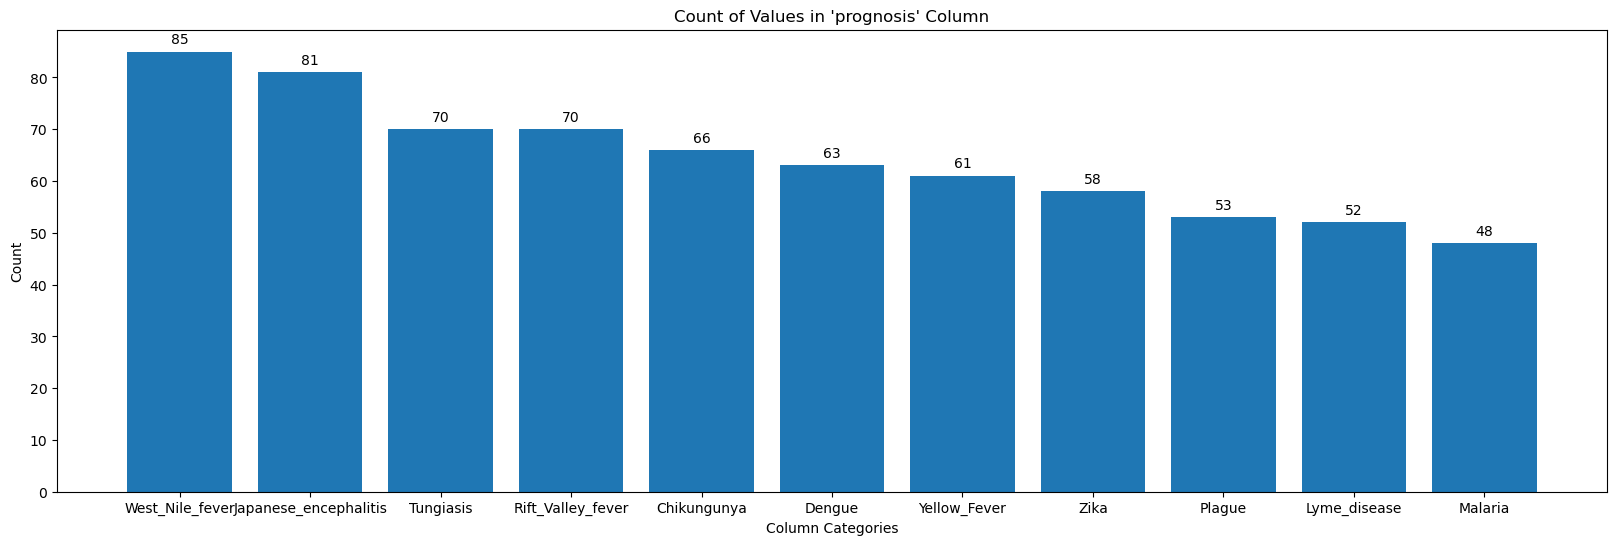

In [14]:
plot_target_column_distribution(train_data, 'prognosis')

In [15]:
def get_correlated_cols(df, threshold):
    """Function to get highly correlated columns of a DataFrame"""

    # Compute the correlation matrix
    corr_matrix = df.corr()

    # Get the absolute correlation values with the target variable
    corr_with_target = abs(corr_matrix.iloc[:-1,-1])

    # Get the highly correlated columns
    correlated_cols = corr_with_target[corr_with_target > threshold].index.tolist()

    return correlated_cols

In [16]:
def check_correlation(df, threshold=0.5, correlated_columns_only=True):
    """Function to check correlation of a DataFrame"""

    # Get the correlated columns if required
    if correlated_columns_only:
        cols = get_correlated_cols(df, threshold)
    else:
        cols = df.columns

    # Compute the correlation matrix
    corr = df[cols].corr()

    # Set the size of the figure
    plt.figure(figsize=(30, 15))

    # Create a heatmap to visualize the correlation matrix
    sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

    # Set the chart title and axis labels
    plt.title('Correlation Matrix')
    plt.xlabel('Columns')
    plt.ylabel('Columns')

    # Show the plot
    plt.show()

    # Return the correlation matrix
    return corr


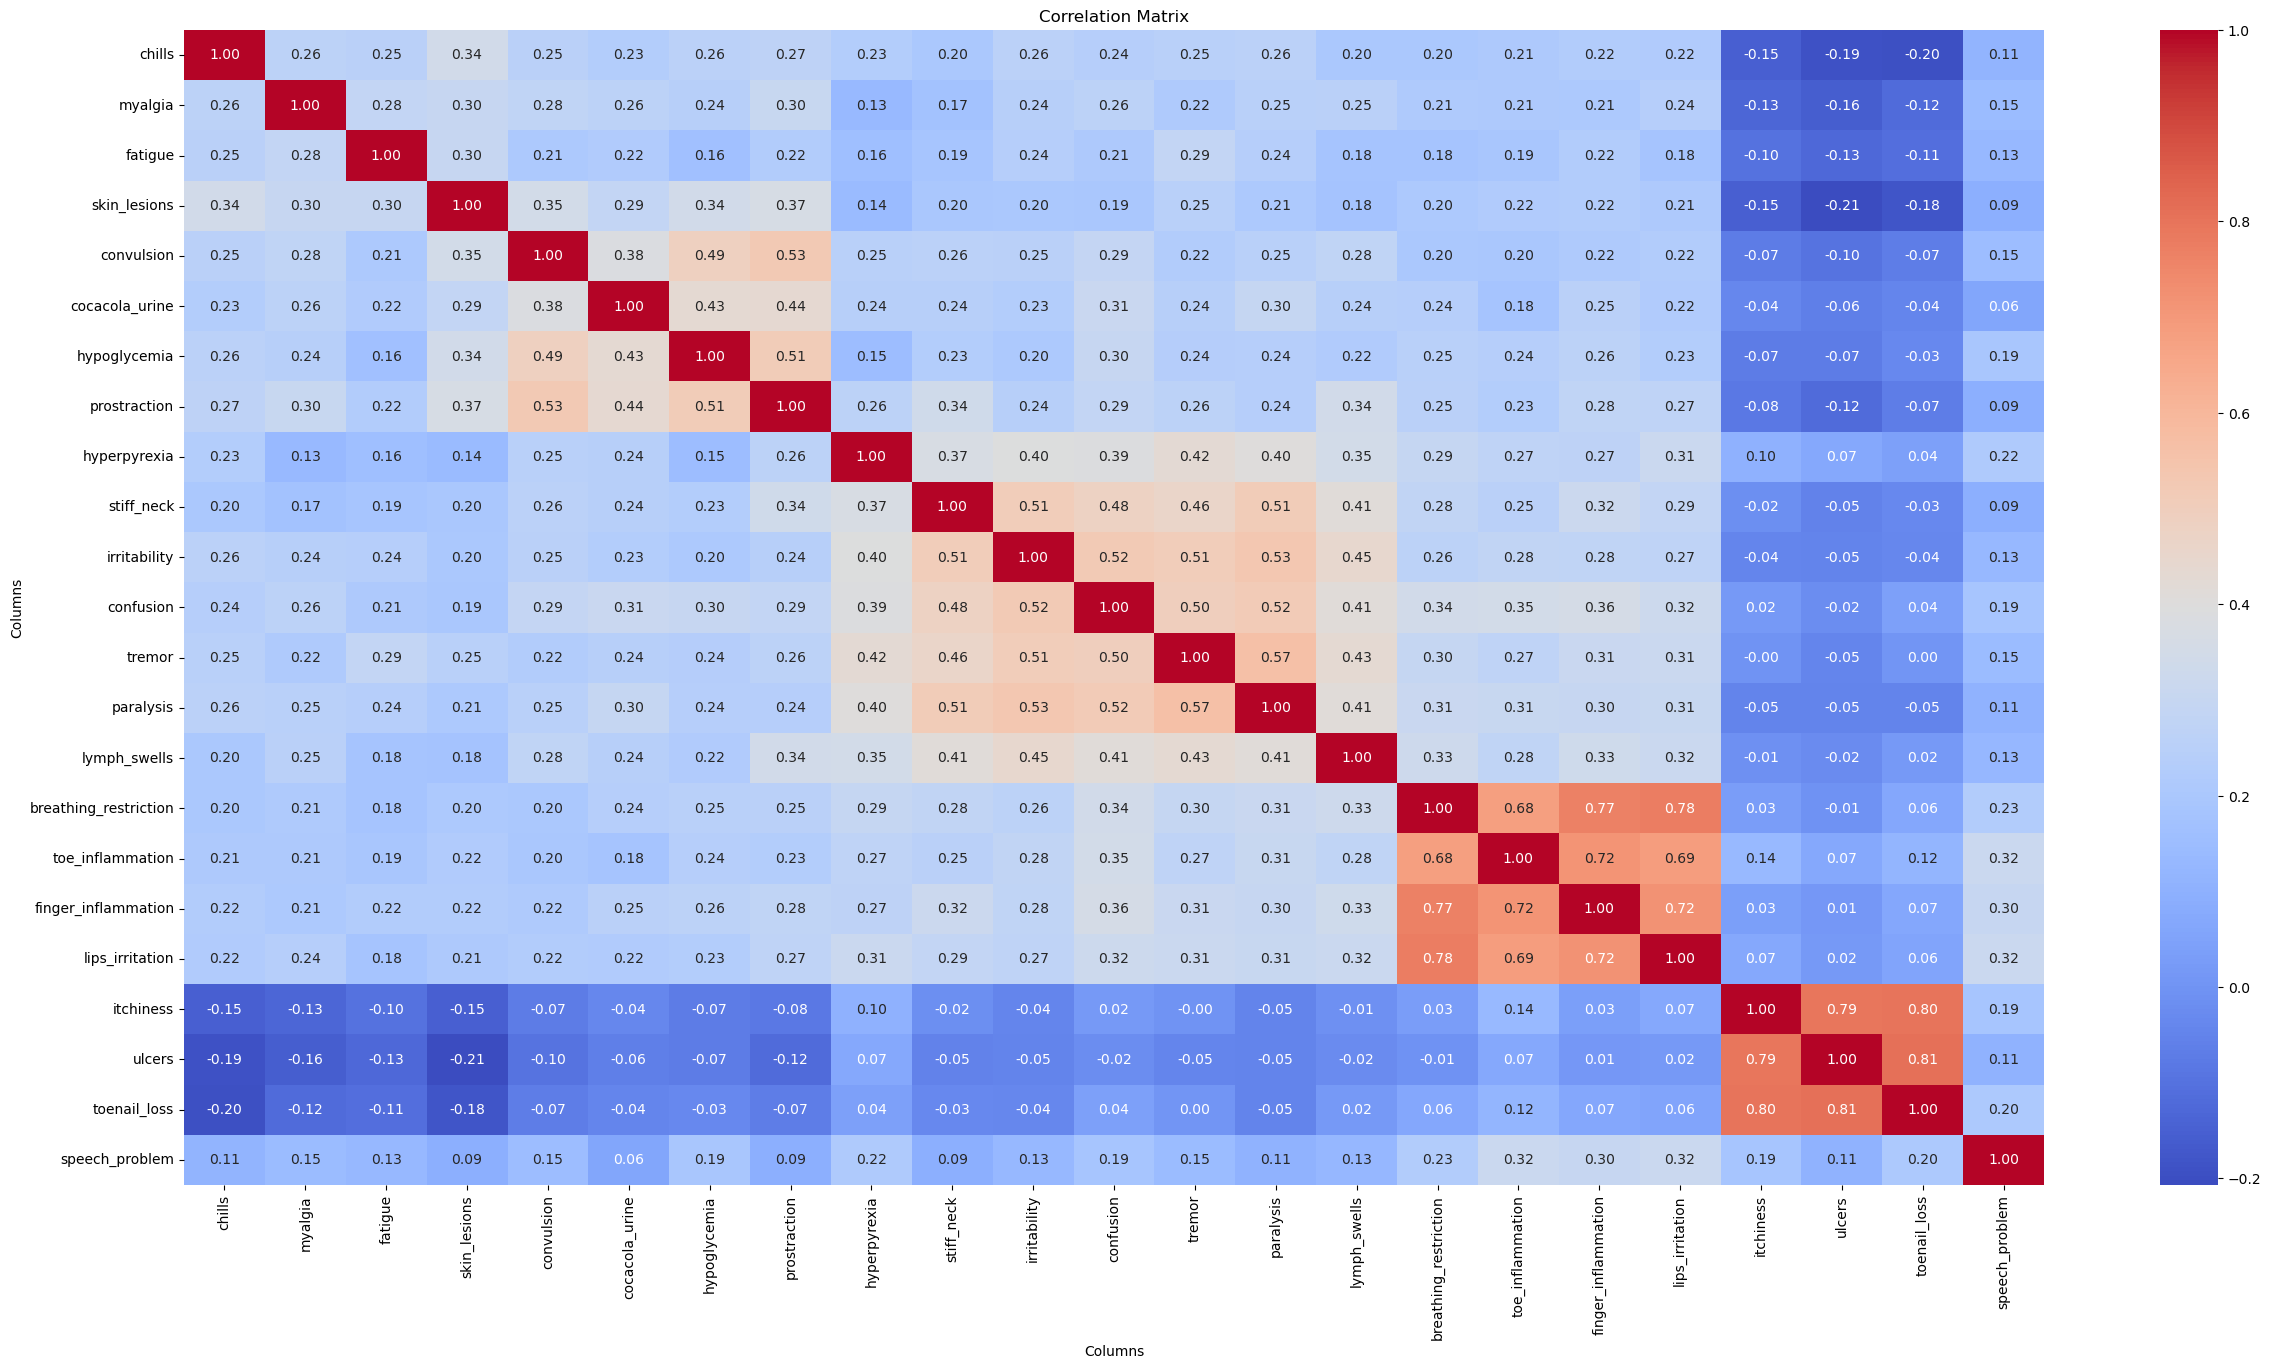

,chills,myalgia,fatigue,skin_lesions,convulsion,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem
chills,1.000000,0.263972,0.253988,0.344017,0.254916,0.228682,0.257631,0.265434,0.228860,0.199491,0.259501,0.240244,0.249040,0.255476,0.199898,0.199932,0.212293,0.223964,0.221414,-0.152373,-0.191502,-0.195795,0.112937
myalgia,0.263972,1.000000,0.284365,0.300676,0.278414,0.262318,0.244506,0.303396,0.134882,0.170855,0.241152,0.263444,0.217424,0.246787,0.251002,0.212831,0.210705,0.206110,0.237426,-0.131925,-0.156436,-0.118662,0.145184
fatigue,0.253988,0.284365,1.000000,0.298417,0.205388,0.217635,0.161009,0.224256,0.157297,0.188085,0.240464,0.211688,0.285386,0.240856,0.179874,0.181913,0.191166,0.223428,0.180795,-0.101823,-0.128267,-0.108015,0.129336
skin_lesions,0.344017,0.300676,0.298417,1.000000,0.347984,0.285136,0.341862,0.366507,0.140793,0.195636,0.200571,0.194201,0.245915,0.207107,0.178406,0.204228,0.220508,0.222286,0.212206,-0.153217,-0.206782,-0.179376,0.094560
convulsion,0.254916,0.278414,0.205388,0.347984,1.000000,0.384722,0.489574,0.528475,0.246012,0.259557,0.253887,0.289834,0.224160,0.247854,0.277917,0.201971,0.198015,0.216869,0.223441,-0.071773,-0.097006,-0.068300,0.148520
cocacola_urine,0.228682,0.262318,0.217635,0.285136,0.384722,1.000000,0.430505,0.436208,0.244214,0.244967,0.230293,0.309949,0.241274,0.296790,0.241628,0.239990,0.181186,0.250789,0.219541,-0.041407,-0.063179,-0.043099,0.058247
hypoglycemia,0.257631,0.244506,0.161009,0.341862,0.489574,0.430505,1.000000,0.511167,0.149279,0.228707,0.204818,0.301057,0.235320,0.240290,0.220925,0.248681,0.240452,0.262330,0.231191,-0.074760,-0.071632,-0.032452,0.191887
prostraction,0.265434,0.303396,0.224256,0.366507,0.528475,0.436208,0.511167,1.000000,0.260173,0.337506,0.243158,0.287634,0.263952,0.236822,0.342289,0.252734,0.230566,0.277848,0.270334,-0.082395,-0.117376,-0.069495,0.090540
hyperpyrexia,0.228860,0.134882,0.157297,0.140793,0.246012,0.244214,0.149279,0.260173,1.000000,0.368997,0.396423,0.391735,0.424937,0.404624,0.345252,0.294914,0.270537,0.268873,0.311898,0.102452,0.070868,0.042961,0.215696
stiff_neck,0.199491,0.170855,0.188085,0.195636,0.259557,0.244967,0.228707,0.337506,0.368997,1.000000,0.505190,0.477791,0.460368,0.512032,0.414092,0.279696,0.252746,0.319732,0.286926,-0.015506,-0.052610,-0.033565,0.093754


In [17]:
check_correlation(train_data, threshold = 0.1, correlated_columns_only = True)

## Format Training Data

In [18]:
def encode_and_map_categorical_target(df, target_col, drop_original=True):
    """Encode a categorical target column and print the mapping.
    
    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        target_col (str): The name of the target column to be encoded.
        drop_original (bool, optional): Whether to drop the original target column after encoding. Defaults to True.
        
    Returns:
        pandas.DataFrame: The DataFrame with the encoded target column.
        LabelEncoder: The fitted LabelEncoder instance.
        dict: The dictionary mapping original categories to numeric codes.
    """

    # Create a LabelEncoder instance
    encoder = LabelEncoder()

    # Fit the encoder on the target column and transform it
    df[f'{target_col}_numeric'] = encoder.fit_transform(df[target_col])

    # Create a dictionary mapping the original values to the encoded values
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

    # Print the mapping
    for category, numeric_code in mapping.items():
        print(f"{category}: {numeric_code}")
    print()

    # Drop the original target column, if specified
    if drop_original:
        df.drop(target_col, axis=1, inplace=True)

    return df, encoder, mapping

In [19]:
train_data, encoder, mapping = encode_and_map_categorical_target(train_data, 'prognosis')
train_data.head()

Chikungunya: 0
Dengue: 1
Japanese_encephalitis: 2
Lyme_disease: 3
Malaria: 4
Plague: 5
Rift_Valley_fever: 6
Tungiasis: 7
West_Nile_fever: 8
Yellow_Fever: 9
Zika: 10



,id,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,pleural_effusion,ascites,gastro_bleeding,swelling,nausea,chills,myalgia,digestion_trouble,fatigue,skin_lesions,stomach_pain,orbital_pain,neck_pain,weakness,back_pain,weight_loss,gum_bleed,jaundice,coma,diziness,inflammation,red_eyes,loss_of_appetite,urination_loss,slow_heart_rate,abdominal_pain,light_sensitivity,yellow_skin,yellow_eyes,facial_distortion,microcephaly,rigor,bitter_tongue,convulsion,anemia,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,stiff_neck,irritability,confusion,tremor,paralysis,lymph_swells,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis_numeric
0,0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,3
3,3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,6


In [20]:
# Split training data into features and labels dataframes/series
features = train_data.iloc[:, :-1]
labels = train_data.iloc[:, -1]

## Machine Learning
### Logistic Classication

In [ ]:
# Split the data into training and validation datasets
def split_data(features, labels, test_size=0.2, random_state=10):
    X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    return X_train, X_val, y_train, y_val

# Instantiate the function from above
X_train, X_val, y_train, y_val = split_data(features, labels)

In [ ]:
def perform_logistic_regression(X_train, y_train, X_val, y_val):
    """Perform a Grid Search using Logistic Regression."""
    
    param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['newton-cg', 'liblinear'],
        'max_iter': [100, 500, 1000]
    }

    # Create a LogisticRegression object
    lr = LogisticRegression(random_state=10, max_iter=1000)

    # Create a GridSearchCV object
    grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters and the corresponding score
    print('Best parameters:', grid_search.best_params_)
    print('Best score:', grid_search.best_score_)
    
    # Evaluate the best model on the validation set
    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_classification_report = classification_report(y_val, y_val_pred)

    print("Validation accuracy:", val_accuracy)
    print("Validation classification report:\n", val_classification_report)

In [ ]:
perform_logistic_regression(X_train, y_train, X_val, y_val)

### Random Forest

In [ ]:
# Split the data into training and validation datasets
def split_data(features, labels, test_size=0.2, random_state=10):
    X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    return X_train, X_val, y_train, y_val

# Instantiate the function from above
X_train, X_val, y_train, y_val = split_data(features, labels)

In [ ]:
def perform_random_forest_grid_search(X_train, X_test, y_train, y_test):
    """Function to manually perform grid search using Random Forest mode."""

    # Initializing a DataFrame to save each model results
    rf_results = pd.DataFrame()

    # Length of features
    feature_length = len(features)

    # % of max features to use
    max_features_params = [0.2, 0.4, 0.6, 0.8]

    # Loop to use different parameters in the model
    #for f in np.arange(2, feature_length * 0.8, 5):
    for f in max_features_params:
        for e in np.arange(10, 350, 20):
            # Create Random Forest model
            clf = RandomForestClassifier(max_features=f,
                                         random_state=0,
                                         max_depth = 20,
                                         n_estimators=e)

            # Fit and train the model using the training data
            clf.fit(X_train, y_train.values.ravel())

            # Score the model based on 'cv' folds
            clf_scores = cross_val_score(clf, X_train, y_train.values.ravel(), cv=5)

            # Score the model on the test data
            y_pred = clf.predict(X_test)
            accuracy = clf.score(X_test, y_test)

            # Calculate the MCC for testing data
            mcc = matthews_corrcoef(y_test, y_pred)

            # Calculate the log loss for training and testing data
            y_train_proba = clf.predict_proba(X_train)
            train_log_loss = log_loss(y_train, y_train_proba)

            y_test_proba = clf.predict_proba(X_test)
            test_log_loss = log_loss(y_test, y_test_proba)

            # Print average scores and +/- two standard deviations away (covering 95% of tests)
            print(">> max_features: %s, num_estimators: %i, Train Accuracy: %0.4f (+/- %0.3f), Test Accuracy: %0.4f, Test MCC: %0.4f, Train Log Loss: %0.4f, Test Log Loss: %0.4f" % (str(f), e, clf_scores.mean(), clf_scores.std() * 2, accuracy, mcc, train_log_loss, test_log_loss))

            # New row for results dataframe containing model hyperparameters and results
            new_row = {'model_type': type(clf).__name__,
                       'max_features': f,
                       'num_estimators': e,
                       'train_accuracy': clf_scores.mean(),
                       'train_accuracy_std': clf_scores.std(),
                       'test_accuracy': accuracy,
                       'mcc': mcc,
                       'train_log_loss': train_log_loss,
                       'test_log_loss': test_log_loss}

    return rf_results.append(new_row, ignore_index=True)

In [ ]:
perform_random_forest_grid_search(X_train, X_val, y_train, y_val)

In [ ]:
def grid_search_random_forest(X, y, param_grid=None):
    if param_grid is None:
        param_grid = {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize the Random Forest classifier
    rf = RandomForestClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Print the best combination of hyperparameters
    print("Best parameters found: ", grid_search.best_params_)

    # Evaluate the best model on the test set
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test)
    print("Classification report:")
    print(classification_report(y_test, y_pred))

    return best_rf

### Neural Network

In [ ]:
# Split the data into training and validation datasets
def split_data(features, labels, test_size=0.2, random_state=10):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Instantiate the function from above
X_train, X_test, y_train, y_test = split_data(features, labels)

In [ ]:
# Define function to select optimizer and learning rate
def select_optimizer(optimize, learn):
    """Used to select an optimizer and learning rate."""
    import tensorflow as tf
    
    optimizer_dict = {'Adam': tf.optimizers.Adam(learning_rate = learn),
                      'SGD': tf.optimizers.SGD(learning_rate = learn),
                      'Adadelta': tf.optimizers.Adadelta(learning_rate = learn),
                      'RMSprop': tf.optimizers.RMSprop(learning_rate = learn),
                      'Adagrad': tf.optimizers.Adagrad(learning_rate = learn),
                      'Adamax': tf.optimizers.Adamax(learning_rate = learn),
                      'Nadam': tf.optimizers.Nadam(learning_rate = learn),
                      'Ftrl': tf.optimizers.Ftrl(learning_rate = learn),
                      }
    
    return optimizer_dict[optimize]

In [ ]:
# Finding the shape for input_dim
print(f"The shape of the dataset: {X_train.shape}")
dims = X_train.shape[1]
print(f'Dimensions:{dims}')

In [ ]:
# List of optimizers and learning rates to be looped through
list_optimizers = ['Adam', 'SGD', 'Adadelta', 'RMSprop', 'Adagrad', 'Adamax', 'Nadam']
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]

# Number of epochs per model
nn_epochs = 500

# Validation Split
val_split = 0.2

# Initializing a DataFrame to save each model results
nn_results = pd.DataFrame()

# Loop
for opt in list_optimizers:
    for lr in learning_rates:
        
        # Building a multilayer neural network using Keras
        model = Sequential()

        model.add(Dense(dims, input_dim = dims, activation = 'elu'))
        model.add(Dropout(0.50))
        model.add(Dense(dims * 0.5, activation = 'elu'))
        model.add(Dropout(0.50))
        model.add(Dense(11, activation = 'softmax'))
        
        # Compile the model to provide the training parameters
        model.compile(optimizer = select_optimizer(opt, lr), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
        
        # Train the model
        nn_history = model.fit(X_train, y_train, epochs = nn_epochs, verbose = 1, validation_split = val_split)
 
        # Evaluate the trained model on training data
        nn_train_eval = model.evaluate(X_train, y_train)
 
        # Evaluate the trained model
        nn_test_eval = model.evaluate(X_test, y_test)
        
        # Predicting using the testing data
        #y_test_pred = model.predict_classes(X_test) # old 
        #y_test_pred = (model.predict(X_test) > 0.5).astype("int32") # for binary classification
        y_test_pred = np.argmax(model.predict(X_test), axis=1) # for multi classification
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # New row for results dataframe containing model hyperparameters and results
        
        new_row = {'optimizer': str(opt),
                   'learning_rate': lr,
                   'epochs': nn_epochs,
                   'validation_split': val_split,
                   'train_accuracy': nn_train_eval[1],
                   'train_log_loss': nn_train_eval[0],
                   'test_accuracy': test_accuracy,
                   'test_log_loss': nn_test_eval[0]
                   }
        
        nn_results = nn_results.append(new_row, ignore_index = True)
        
        # Plot Accuracy
        acc_train = nn_history.history['accuracy']
        acc_val = nn_history.history['val_accuracy']
        epochs = range(0, nn_epochs)
        plt.plot(epochs, acc_train, 'g', label = 'Training Accuracy')
        plt.plot(epochs, acc_val, 'b', label = 'Validation Accuracy')
        plt.title("Optimizer: %s - Learning Rate: %f" % (opt, lr))
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()
        
        # Plot Loss
        loss_train = nn_history.history['loss']
        loss_val = nn_history.history['val_loss']
        epochs = range(0, nn_epochs)
        plt.plot(epochs, loss_train, 'g', label = 'Training loss')
        plt.plot(epochs, loss_val, 'b', label = 'Validation loss')
        plt.title("Optimizer: %s - Learning Rate: %f" % (opt, lr))
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Printing metrics
        print(f"The training accuracy is: {nn_train_eval[1]}")
        print(f"The training loss is: {nn_train_eval[0]}")
        print(f"The testing accuracy is: {test_accuracy}")
        print(f"The testing loss is: {nn_test_eval[0]}")
        print()

In [ ]:
nn_results.head(50)

### XGBoost

In [22]:
# Split the data into training and validation datasets
def split_data(features, labels, test_size=0.2, random_state=10):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Instantiate the function from above
X_train, X_test, y_train, y_test = split_data(features, labels)

In [25]:
def find_optimal_xgb_model(X_train, X_test, y_train, y_test):
    """
    Purpose:
        Find the optimal XGBoost model using cross-validation and a parameter grid search.
    
    Args:
        X_train (pandas.DataFrame): The DataFrame containing the training features.
        X_test (pandas.DataFrame): The DataFrame containing the validation features.
        y_train (pandas.Series): The Series containing the training labels.
        y_test (pandas.Series): The Series containing the validation labels.
        
    Returns:
        XGBClassifier: The optimal XGBoost classifier model.
    """
    # Define the parameter grid to search
    param_grid = {
        'learning_rate': [0.1, 0.01],
        'max_depth': [3, 5, 7],
        'n_estimators': [100, 200, 500],
        'gamma': [0, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }

    # Create an XGBoost classifier model
    xgb = XGBClassifier(random_state=42)

    # Perform cross-validation with parameter grid search
    grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=2)
    grid.fit(X_train, y_train)

    # Print the best parameters and score
    print("Best parameters:", grid.best_params_)
    print("Best score:", grid.best_score_)

    # Get the optimal model and evaluate it on the validation set
    best_model = grid.best_estimator_
    accuracy = best_model.score(X_test, y_test)
    print("Validation accuracy:", accuracy)

    # Return the optimal model
    return best_model

In [ ]:
# Instantiate the function with the training and validation data
xgboost_model = find_optimal_xgb_model(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.7s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth